<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Уточнение-задачи" data-toc-modified-id="Уточнение-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Уточнение задачи</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-данных-договора-(contract_df)" data-toc-modified-id="Обработка-данных-договора-(contract_df)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка данных договора (contract_df)</a></span></li><li><span><a href="#Итог-предобработки" data-toc-modified-id="Итог-предобработки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Итог предобработки</a></span></li></ul></li><li><span><a href="#Расширенный-EDA" data-toc-modified-id="Расширенный-EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расширенный EDA</a></span></li><li><span><a href="#Разработка-модели-машинного-обучения" data-toc-modified-id="Разработка-модели-машинного-обучения-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разработка модели машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Работа-с-признаками" data-toc-modified-id="Работа-с-признаками-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Работа с признаками</a></span><ul class="toc-item"><li><span><a href="#Корреляция-и-мультиколлинеарность" data-toc-modified-id="Корреляция-и-мультиколлинеарность-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Корреляция и мультиколлинеарность</a></span></li><li><span><a href="#Сплит" data-toc-modified-id="Сплит-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Сплит</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#XGBoostClassifier" data-toc-modified-id="XGBoostClassifier-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>XGBoostClassifier</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Метод-опорных-векторов-SVM" data-toc-modified-id="Метод-опорных-векторов-SVM-5.2.6"><span class="toc-item-num">5.2.6&nbsp;&nbsp;</span>Метод опорных векторов SVM</a></span></li><li><span><a href="#Вывод-из-обучения" data-toc-modified-id="Вывод-из-обучения-5.2.7"><span class="toc-item-num">5.2.7&nbsp;&nbsp;</span>Вывод из обучения</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Итоговый-отчет" data-toc-modified-id="Итоговый-отчет-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговый отчет</a></span></li></ul></div>

# Проект "Телеком"

Необходимо разработать модель прогнозирования оттока клиентов для оператора связи. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. 

## Первичный анализ данных

Данные состоят из файлов, полученных из разных источников.

Во всех файлах столбец `customerID` содержит код клиента.

Прежде всего, необходимо взглянуть на данные и разработать план последующей работы. Загрузим необходимые библиотеки и данные:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook

from xgboost import XGBClassifier

from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE

import phik
from phik.report import plot_correlation_matrix
from phik import report

import gc
from IPython.display import Markdown, display

In [2]:
def pd_read(path):
    df = pd.read_csv(path)
    display(Markdown('**Первые пять записей и общая информация по таблице:**'), df.head())
    display(df.info())
    display(Markdown('**Статистика по данным:**'), df.describe(include='all'))
    display(Markdown('**Таблица корреляции:**'), df.corr())
    display(Markdown('**Размер данных:**'), df.shape)
    return df

In [3]:
try:
    contract_df = pd_read('C://Users//SpecialOne//data_science//datasets//final_provider//contract.csv')
except ImportError:
    contract_df = pd_read('/datasets/final_provider/contract.csv')
except FileNotFoundError:
    contract_df = pd_read('/datasets/final_provider/contract.csv')

**Первые пять записей и общая информация по таблице:**

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

**Статистика по данным:**

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


**Таблица корреляции:**

,MonthlyCharges
MonthlyCharges,1.0


**Размер данных:**

(7043, 8)

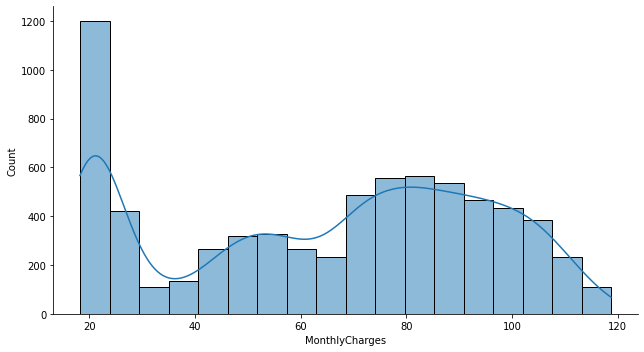

In [5]:
g = sns.displot(contract_df['MonthlyCharges'],
            kde = True
           )
g.fig.set_figheight(5)
g.fig.set_figwidth(10)

В данном наборе содержится информация о деталях контракта клиента. Как мы видим, образовалось 3 условных кластера: большинство обходится минимальным пакетом услуг и ограничиваются в 25 ед. оплаты в месяц. Есть группа клиентов со средней оплатой около 50-55, а также группа с наибольшей дисперсией: средняя оплата в ней примерно 85-90. Также, данный набор содержит наш целевой признак `EndDate`, содержащий информацию о том, ушел ли клиент.

In [4]:
try:
    internet_df = pd_read('C://Users//SpecialOne//data_science//datasets//final_provider//internet.csv')
except ImportError:
    internet_df = pd_read('/datasets/final_provider/internet.csv')
except FileNotFoundError:
    internet_df = pd_read('/datasets/final_provider/internet.csv')

**Первые пять записей и общая информация по таблице:**

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

**Статистика по данным:**

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


**Таблица корреляции:**

""


**Размер данных:**

(5517, 8)

In [7]:
[display(x.value_counts()) for x in [internet_df['InternetService'], 
                                     internet_df['OnlineSecurity'], 
                                     internet_df['OnlineBackup'],
                                     internet_df['DeviceProtection'],
                                     internet_df['TechSupport'],
                                     internet_df['StreamingTV'],
                                     internet_df['StreamingMovies']]]

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

No     3473
Yes    2044
Name: TechSupport, dtype: int64

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

[None, None, None, None, None, None, None]

Данные с деталями интернет-услуг. Преимущественно распределены равномерно, откровенного дисбаланса нет.

In [5]:
try:
    personal_df = pd_read('C://Users//SpecialOne//data_science//datasets//final_provider//personal.csv')
except ImportError:
    personal_df = pd_read('/datasets/final_provider/personal.csv')
except FileNotFoundError:
    personal_df = pd_read('/datasets/final_provider/personal.csv')

**Первые пять записей и общая информация по таблице:**

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

**Статистика по данным:**

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


**Таблица корреляции:**

,SeniorCitizen
SeniorCitizen,1.0


**Размер данных:**

(7043, 5)

В данном датафрейме содержится информация о личном статусе клиента: бинарно размеченные данные о поле, пенсионер ли он, о партнере и о наличии иждевенцев.

In [6]:
try:
    phone_df = pd_read('C://Users//SpecialOne//data_science//datasets//final_provider//phone.csv')
except ImportError:
    phone_df = pd_read('/datasets/final_provider/phone.csv')
except FileNotFoundError:
    phone_df = pd_read('/datasets/final_provider/phone.csv')

**Первые пять записей и общая информация по таблице:**

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

**Статистика по данным:**

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


**Таблица корреляции:**

""


**Размер данных:**

(6361, 2)

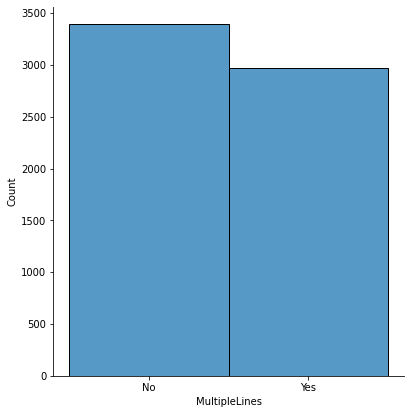

In [10]:
g = sns.displot(phone_df['MultipleLines']
           )
g.fig.set_figheight(6)
g.fig.set_figwidth(6)

In [11]:
phone_df['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

В данном наборе информация о телефонном тарифе клиента, признак `MultipleLines` классифицирован почти равномерно. 

**Вывод:** данные загружены и уже можно сделать небольшой вывод о том, что необходима предобработка. Большое количество признаков представлены в формате `Yes/No`, что не очень удобно для работы с ними в дальнейшем. Также предстоит изменить типы данных большинства признаков, которые представлены типом `object`.

Составим предварительный план:

1. **Первичный анализ и разработка плана работы:** 

 1. Загрузка и составление представления о данных. 
 2. Обозначение дальнейших шагов в работе.
 
 
2. **Уточнение задачи:** 
    1. Составление списка уточняющих вопросов к тимлиду, с целью дополнить информацию о задаче.


3. **Предобработка данных:** 
    1. Устранение ошибок в исходных данных и приведение их в необходимый для разработки модели вид.


4. **Разработка модели:** 
    1. Применение и выбор лучшей модели машинного обучения или глубокого обучения в рамках данной задачи.
    
    
5. **Итоговый отчет:** 
  1. Доведение выводов о работе для заказчика.

## Уточнение задачи

Некоторые из деталей после первичного анализа данным остаются неизвестными. Составим список основых уточненяющих вопросов:

1. Каким образом оценивается модель: какие метрики и их пороги котируются в рамках данной задачи?
2. Вопрос о разработке модели. В рамках задачи, мы планируем валидировать несколько моделей машинного обучения и выбрать лучшую. Необходимо ли предоставлять отчет о работе всех тестируемых моделей или достаточно остановится на лучшей?
3. Есть ли у компании возможности внедрять модели глубокого обучения или в рамках задачи нейросети не стоит рассматривать?
4. Мы планируем разделить данные для обучения в пропорции 80/10/10. Является ли такой вариант сплита нормальным для заказчика или у него есть собственные нормативы?

## Предобработка данных

Проверим датафреймы на наличие явных пропусков и дубликатов:

In [7]:
for i in [contract_df, internet_df, phone_df, personal_df]:
    display(Markdown('**Количество пропусков:**'), i.isna().sum())
    display(Markdown('**Количество дубликатов:**'), i.duplicated().sum())

**Количество пропусков:**

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**Количество дубликатов:**

0

**Количество пропусков:**

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**Количество дубликатов:**

0

**Количество пропусков:**

customerID       0
MultipleLines    0
dtype: int64

**Количество дубликатов:**

0

**Количество пропусков:**

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

**Количество дубликатов:**

0

### Обработка данных договора (contract_df)

In [13]:
cdf = contract_df.copy()

В данных есть скрытые пропуски в признаке `TotalCharges`:

In [14]:
cdf[cdf['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Не прошло и месяца с начала контракта по момент создания датасета. Пропуски связаны с тем, что клиенту еще не успели посчитать сумму, заменим пропуск на соответствующее значение по сумме в признаке `MonthlyCharges`:

In [15]:
cdf['TotalCharges'] = np.where(cdf['TotalCharges'] == ' ', cdf['MonthlyCharges'], cdf['TotalCharges'])

Далее, приведем типы данных для `BeginDate` и `TotalCharges` к более соответствующим:

In [16]:
cdf['BeginDate'] = pd.to_datetime(cdf['BeginDate'])
cdf['TotalCharges'] = cdf['TotalCharges'].astype('float64')

Из признаков `BeginDate` и `EndDate` можно посчитать разницу и сформировать новый признак количества дней со с момента начала контракта:

In [17]:
cdf['temp'] = cdf['EndDate']

In [18]:
cdf['temp'] = cdf['temp'].apply(lambda d: '2020-02-01' if d == 'No' else d)
cdf['temp'] = pd.to_datetime(cdf['temp'])

In [19]:
cdf['DaysCnt'] = (cdf['temp'] - cdf['BeginDate']).dt.days
cdf = cdf.drop(['temp'], axis=1)

Теперь у нас есть новый признак `DaysCnt`. Также решением будет преобразовать целевой признак кодированием в признак `Left`, который будет говорить нам, покинул клиент оператора или нет:

In [20]:
cdf['EndDate'] = cdf['EndDate'].apply(lambda d: 0 if d == 'No' else 1)
cdf = cdf.rename(columns={'EndDate': 'Left'})

### Итог предобработки

Объединим наши датафреймы в один по признаку `customerID`:

In [21]:
df = cdf.merge(personal_df, on='customerID', how='left')
df = df.merge(internet_df, on='customerID', how='left')
df = df.merge(phone_df, on='customerID', how='left')
df.head()

,customerID,BeginDate,Left,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DaysCnt,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.50,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,61,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1840.75,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65,61,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


По итогу объединения у нас появились пропуски связанные с датафреймами с информацией об интернет-услугах и о мобильных-услугах. Если образовался пропуск, значит клиент не использует данную услугу, о чем и свидетельствует отсутствие записи в соответствующем датафрейме:

In [22]:
display(Markdown('**Количество пропусков:**'), df.isna().sum())

**Количество пропусков:**

customerID             0
BeginDate              0
Left                   0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
DaysCnt                0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Логично будет заполнить такие пропуски нулем, что будет говорить о том, что клиент соответствующей услугой не пользуется:

In [23]:
cols = ['InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines']
for i in cols:
    df[i] = df[i].fillna('No')

In [24]:
display(Markdown('**Количество пропусков:**'), df.isna().sum())

**Количество пропусков:**

customerID          0
BeginDate           0
Left                0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
DaysCnt             0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

**Вывод:** в процессе предобработки мы подготовили и собрали все данные в одно для дальнейшей разработки модели машинного обучения на их основе. В ходе предобработки мы:

* Обработали явные и неявные пропущенные значения;
* Создали новый признак количества дней `DaysCnt`;
* Соединили все датафреймы в один.

Теперь данные готовы для разработки модели и расширенному анализу, взглянем на них:

In [25]:
df.head()

,customerID,BeginDate,Left,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DaysCnt,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.50,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,61,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1840.75,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65,61,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [26]:
del cdf, phone_df, personal_df, internet_df, contract_df
gc.collect()

87

## Расширенный EDA

Рассмотрим некоторые признаки после предобработки поподробнее:

In [27]:
%matplotlib inline

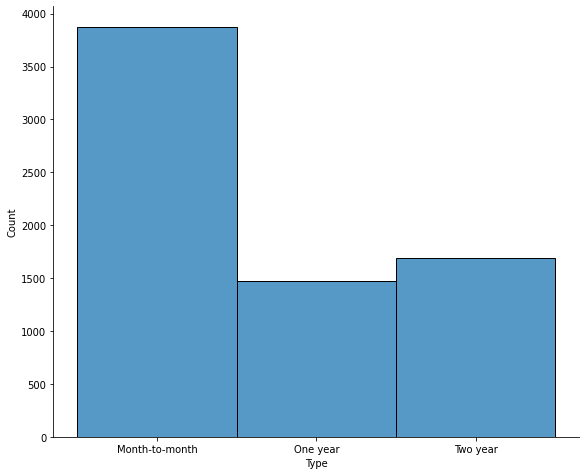

In [28]:
g=sns.displot(df['Type'])
g.fig.set_size_inches(9, 7)

Судя по графику, больше половины клиентов придерживаются помесячной подписки.

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

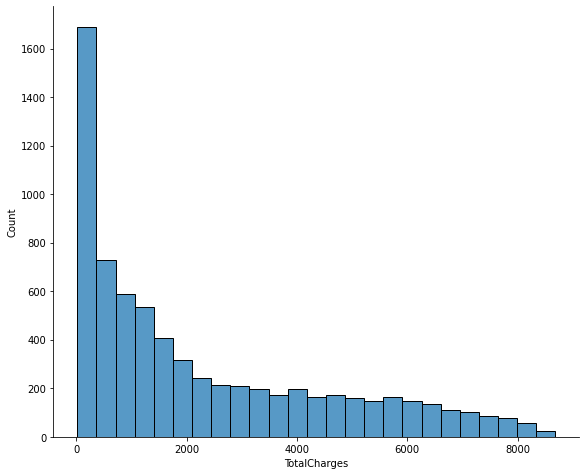

In [29]:
g = sns.displot(df['TotalCharges'])
g.fig.set_size_inches(9, 7)

df['TotalCharges'].describe()

По графику видно, что максимальное значение уходит очень далеко от 0.75-квантиля, однако, к максимальному значению график приближается плавно и нет оснований полагать, что это выброс.

Большее количество клиентов потратили за все время не больше 1500.

count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: DaysCnt, dtype: float64

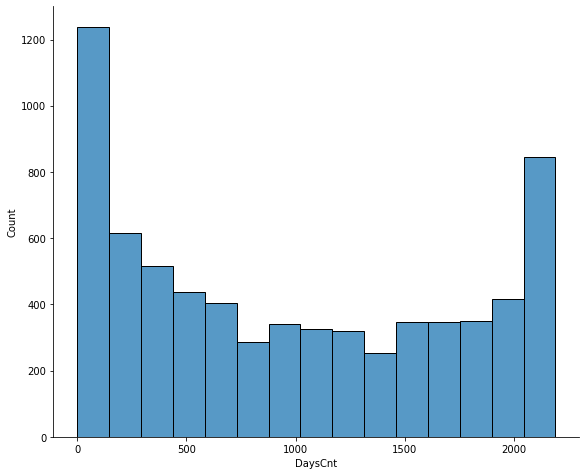

In [30]:
g = sns.displot(df['DaysCnt'])
g.fig.set_size_inches(9, 7)

df['DaysCnt'].describe()

Судя по графику, можно охарактеризовать 3 группы: относительно новые клиенты, которые в системе не больще 250 дней, клиенты, которые давно в системе ( > 2000), остальные пользователи расположились между этими двумя группами.

Остальные признаки визуализировать нет большого смысла - они распределены бинарно. Взглянем на некоторые:

In [31]:
[display(x.value_counts()) for x in [df['SeniorCitizen'], df['gender'], df['Partner'], df['Dependents']]]

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

[None, None, None, None]

Пол и наличие партнера распределены поровну. Статус пенсионера имеет 1/7 от всех клиентов. Иждевенцев имеет чуть большая доля клиентов: 2/7. Проанализируем, какое значение на нашу цель имеет каждый из признаков.

## Разработка модели машинного обучения

### Работа с признаками

Для начала зафиксируем обговоренный в техническом задании `RandomState`, а также зафиксируем `cv` для последующей кросс-валидации.

Признаки `customerID` и `BeginDate` нам больше не нужны:

In [32]:
state = np.random.RandomState(120922)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=state)

df = df.drop(['customerID', 'BeginDate'], axis=1)

Взглянем на целевой признак `Left`:

In [33]:
df['Left'].value_counts()

0    5174
1    1869
Name: Left, dtype: int64

Необходимо учесть, что классы несбалансированны.

#### Корреляция и мультиколлинеарность



Посмотрим также на матрицу корреляции между нашими признаками:

interval columns not set, guessing: ['Left', 'MonthlyCharges', 'TotalCharges', 'DaysCnt', 'SeniorCitizen']


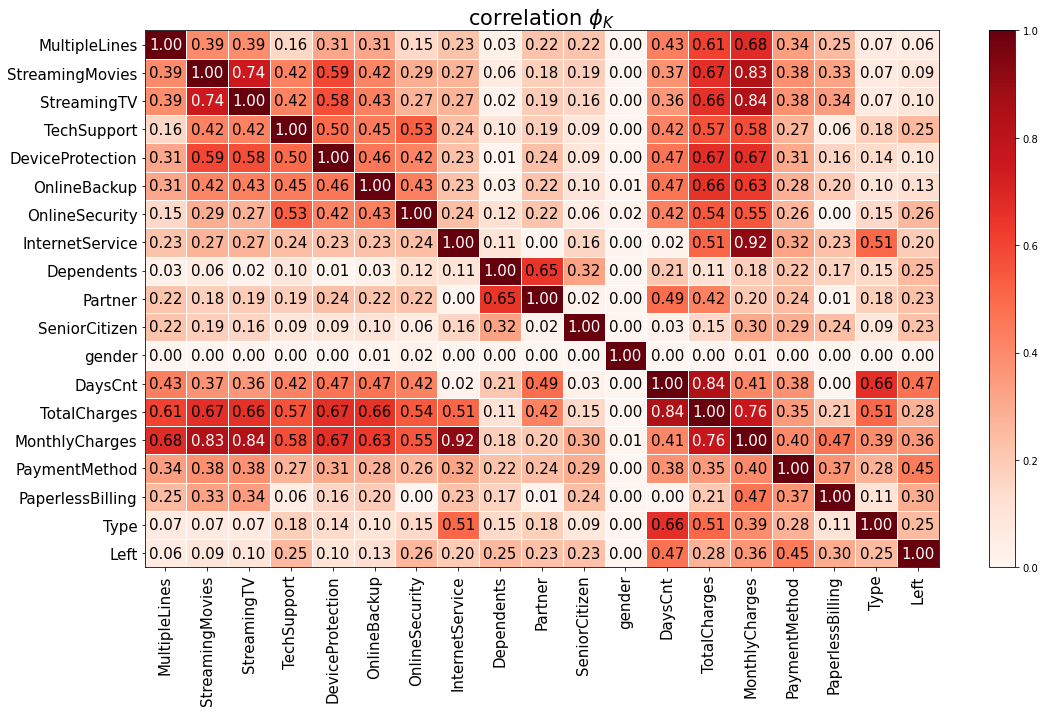

In [34]:
phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 10))
plt.tight_layout()

* Видно, что признак `gender` практически ни с чем не коррелирует. Признаки `MultipleLines`, `StreamingMovies`, `StreamingTV`, `OnlineBackup`, `DeviceProtection` имеют крайне низкую корреляцию с нашим целевым признаком, что является крайне незначительным показателем важности для нашей модели.

* Также необходимо учесть, что при дальнейшем рассмотрении некоторых линейных моделей, нам необходимо разрешить проблему мультиколлинеарности. Такие признаки, как `MonthlyCharges`, `TotalCharges`, `DaysCnt` имеют высокую мультиколлинеарность с другими признаками.

Уберем признаки из первого вывода, а при работе с линейными моделями ограничим данные от признаков из второго пункта:

In [35]:
df = df.drop(['gender', 
              'MultipleLines', 
              'StreamingMovies', 
              'StreamingTV', 
              'OnlineBackup', 
              'DeviceProtection'],
               axis=1)

#### Сплит

Разделим данные на обучающую и тестовую выборки с отделением целевого признака, а также укажем параметр `stratify` для равномерного разделения целевой метки 1 в train и test:

In [36]:
target = 'Left'
X_train, X_test, y_train, y_test = train_test_split(
    df.drop([target], axis=1),
    df[target],
    test_size=0.25,
    random_state=state,
    stratify=df[target]
)

[print(x.shape) for x in [X_train, X_test, y_train, y_test]]

(5282, 12)
(1761, 12)
(5282,)
(1761,)


[None, None, None, None]

В качестве решения для дисбаланса применим технику переcэмплирования синтетического меньшинства `SMOTE`, таким образом искусственно увеличив количество целевых меток:

### Обучение моделей

Для сравнения моделей, будем добавлять результат их работы в таблицу.

Применять модели глубокого обучения, в рамках данной задачи, смысла нет, так как на таком объеме данных практичнее отработают модели классического машинного обучения. Будем рассматривать их.

In [37]:
model = []
ROC_AUC = []

def list_append(model_name, metric):
    model.append(model_name)
    ROC_AUC.append(metric)

Напишем pipeline-функцию, в которой поочередно будем обрабатывать признаки кодировкой и стандартизировать данные с помощью `StandardScaler`, затем ранжировать признаки с помощью Recursive Feature Elimination (`RFECV`) и, непосредственно, обучать модель. Затем провалидируем результат ее работы на наших данных и посчитаем среднее, по которому будем сравнивать модели: 

In [38]:
def make_pipe(model, x):
    
    num_cols = x.select_dtypes(exclude=['object']).columns.tolist()
    cat_cols = x.select_dtypes(include=['object']).columns.tolist()
    
    num_transform = StandardScaler()
    cat_transform = OneHotEncoder(sparse = False, handle_unknown='ignore')
    
    preproc = ColumnTransformer(transformers = [('num', num_transform, num_cols),
                                                ('cat', cat_transform, cat_cols)])
    rfecv = RFECV(estimator=model)
    smt = SMOTE(sampling_strategy=0.5, random_state=state)
    
    pipe = imbPipeline([('Preprocessor', preproc),
                        ('Feature Selection', rfecv),
                        ('SMOTE', smt),
                        ('Model', model)
                       ])
    return pipe

In [39]:
def validation(name, pipe, x, y):    

    n_scores = cross_val_score(pipe, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    roc_auc = round(np.mean(n_scores), 4)
    list_append(name, roc_auc)
    
    print('ROC_AUC: ', round(np.mean(n_scores), 4))

#### XGBoostClassifier

Рассмотрим эффективную модель градиентного бустинга - `XGBClassifier`:

In [40]:
%%time

xgb = XGBClassifier(use_label_encoder=False, random_state=state)
xg_pipe = make_pipe(xgb, X_train)
validation('XGBoost', xg_pipe, X_train, y_train)

ROC_AUC:  0.9366
CPU times: total: 234 ms
Wall time: 7min 26s


#### Lasso

Относительно наших данных, логичным решением будет рассмотреть модели использующих регуляризацию в своей основе. Взглянем на 2 линейные модели: `Lasso`, использующую L1-регуляризацию и `Ridge`, с регуляризацией L2.

Уберем мультиколлиниарные признаки из данных для подачи в линейные модели:

In [43]:
X_lin = X_train.drop(['MonthlyCharges', 'TotalCharges', 'DaysCnt'], axis=1)

In [44]:
%%time

lasso = LassoCV(cv=cv, random_state=state)
lasso_pipe = make_pipe(lasso, X_lin)
validation('LassoCV', lasso_pipe, X_lin, y_train)

ROC_AUC:  0.8229
CPU times: total: 250 ms
Wall time: 7min 9s


#### Ridge

In [45]:
%%time

ridge = Ridge(random_state=state)
ridge_pipe = make_pipe(ridge, X_lin)
validation('Ridge', ridge_pipe, X_lin, y_train)

ROC_AUC:  0.8226
CPU times: total: 203 ms
Wall time: 2.98 s


#### LogisticRegression

Взглянем на простую логистическую регрессию:

In [47]:
%%time

lr = LogisticRegression(random_state=state, class_weight="balanced")
lr_pipe = make_pipe(lr, X_lin)
validation('LogisticRegression', lr_pipe, X_lin, y_train)

ROC_AUC:  0.8126
CPU times: total: 156 ms
Wall time: 15.5 s


#### RandomForestClassifier

Также добавим в наше исследование модель случайного леса для решения задач классификации:

In [49]:
%%time

rfc = RandomForestClassifier(random_state=state, class_weight="balanced")
rfc_pipe = make_pipe(rfc, X_train)
validation('RandomForestClassifier', rfc_pipe, X_train, y_train)

ROC_AUC:  0.8602
CPU times: total: 203 ms
Wall time: 11min 27s


#### Метод опорных векторов SVM

Последней рассмотрим модель `SVM`, основанную на методе опорных векторов. Данный алгоритм можно охарактеризовать как векторную классификацию линейной поддержки:

In [48]:
%%time

svm_m = svm.LinearSVC(max_iter=1000)
svm_pipe = make_pipe(svm_m, X_lin)
validation('SVM', svm_pipe, X_lin, y_train)

ROC_AUC:  0.8216
CPU times: total: 93.8 ms
Wall time: 36.6 s


#### Вывод из обучения

In [50]:
list_tuples = list(zip(model, ROC_AUC))
frame = pd.DataFrame(list_tuples, columns=['model', 'ROC_AUC'])
frame.set_index('model')

,ROC_AUC
model,
XGBoost,0.9366
LassoCV,0.8229
Ridge,0.8226
LogisticRegression,0.8126
SVM,0.8216
RandomForestClassifier,0.8602


При валидации на тренировочных данных, XGBoost обгоняет всех с заметным перевесом, однако RandomForest, LogisticRegression и Ridge-регрессия также показывают способность справится с задачей. 

### Подбор гиперпараметров

In [47]:
%%time

params = {'Model__booster':['gbtree', 'dart'], 
          'Model__n_estimators':[100, 150, 200, 250], 
          'Model__max_depth':[5, 6, 7, 9]}
        
GRD_search = GridSearchCV(xg_pipe, 
                          params, 
                          scoring='roc_auc', 
                          n_jobs=-1, 
                          cv=cv)
GRD_search.fit(X_train, y_train)
    
display(GRD_search.best_params_, GRD_search.best_score_)

{'Model__booster': 'gbtree', 'Model__max_depth': 5, 'Model__n_estimators': 250}

0.9300296768457906

CPU times: total: 1min 45s
Wall time: 3h 49min 6s


In [51]:
try:   
    xg_grid = GRD_search.best_estimator_
except:
    xg_grid = make_pipe(XGBClassifier(booster='gbtree', max_depth=5, n_estimators=250,
                                      use_label_encoder=False, random_state=state), X_train)

### Тестирование модели

Итак, протестируем лучшую модель на тестовых данных:

In [52]:
%%time

xg_grid.fit(X_train, y_train)
pred = xg_grid.predict(X_test)

probabilities_test = xg_grid.predict_proba(X_test)
probabilities_one_valid = probabilities_test[:, 1]

display('Метрика ROC-AUC: ', round(roc_auc_score(y_test, probabilities_one_valid), 4))
display('Точность модели: ', round(accuracy_score(y_test, pred), 4))

'Метрика ROC-AUC: '

0.9487

'Точность модели: '

0.9018

CPU times: total: 3min 43s
Wall time: 57.4 s


Обученная модель выполняет свою задачу с точностью (accuracy): 90%. Метрика ROC-AUC составила: ~0.95. Построим визуализацию roc-curve для наглядности: 

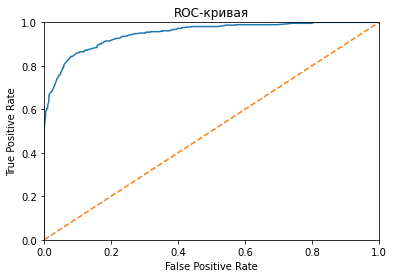

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")
plt.show()

Чем больше площадь под графиком ROC-curve, тем лучше отработала модель, по сравнению с случайным классфикатором. Как мы видим, визуально, площадь получилась большой, что, в купе с показателем ROC-AUC в ~0.95, дает нам основания полагать, что модель справилась с задачей. Убедимся в этом, взглянув и на количественную визуализацию матрицы ошибок:

<AxesSubplot:>

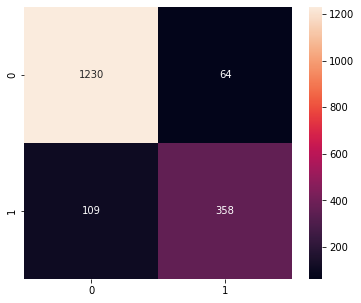

In [54]:
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='1')

## Итоговый отчет

Итак, нам необходимо было разработать модель оттока клиентов оператора сотовой связи, что получилось:


**План итогового решения**

Представленные заказчиком данные были корректно загружены и первично проанализированы. Мы взглянули на их корректность и составили общее представление о данных.


На основе этих выводов, был составен список уточняющих вопросов к тимлиду, где мы дополнили задачу и выяснили ряд технических моментов и, самое главное, критерии оценки качества выполненной задачи.


По большей части предоставленные данные были корректны без большого количества ошибок и необходимости глобально их моделировать. В процессе предобработки мы лишь закодировали ряд категориальных признаков и смоделировали признак количества дней, в которые клиент был в системе оператора.


После предобработки у нас открылась возможность подробнее взглянуть на признаки, в частности - количественные. Мы построили визуализацию по оплате тарифов и услуг от клиентов: помесячной и общей. Неоправданных выбросов не обнаружено, картина распределения логичная. В дальнейшем мы проанализировали важности признаков для моделирования оттока и избавились от имеющих наименьшее значение. Затем, при построении модели, мы их дополнительно проранжируем и будем это учитывать.


С подготовленными данными мы приступили к непосредственной разработке модели. На данном объеме признаков и объектов, применять модели глубокого обучения, смысла мало, поэтому мы рассмотрели модели классического машинного обучения:

 * XGBoostClassifier: именно данный алгоритм экстремального градиентного бустинга показал самый высокий результат.
 
 * Алгоритмы с L1 и L2 регуляризациями, Lasso и Ridge, соответсвенно, с задачей так же справились, но не достигли относительно высоких показателей.
 
 * Линейные модели LogisticRegression и алгоритм опорных векторов SVM показали примерно схожие результаты, что и предыдущие два.
 
 * Алгоритм случайного леса тоже был рассмотрен, и он показал хороший результат.
 
Исходя из исследования, модель на база экстримального градиентного бустинга, XGBoostClassifier, показала лучший результат метрики AUC-ROC (~0.95), и мы рекомендует имеенно ее для продвижения в продакшн.


**Трудности в работе**

Трудностями в процессе работы стали: необходимость учета важности признаков и правильное итоговое объединение данных. Первое мы решили с помощью анализа корреляции признаков и применение метода ранжирования признаков по важности. После объединения данных по идентификатору клиента, появилось большое количество пропущенных значнений. Мы проанализировали тарифы и услуги оператора и приняли решение, что пропуск может образоваться только при условии, что клиент соответствующей услугой не пользуется. 


**Использованные признаки**

В процессе разработки модели, мы избавились от некоторых самых мало влияющих на целевой признаки. Такие признаки как, например, признак пола, имеет низкую корреляцию практичеки со всеми остальными - его можно считать шумом. От некоторых таких мы избавились. Признак даты начала договора рассматривать было бы не корректно, поэтому мы сгенерировали на его основе новый - признак количества дней, которые клиент остается с оператором.


**Конечная модель**

Итоговую модель мы построили через пайплайн со следующим содержанием:

* В начале находится алгоритм ранжирования признаков по важности;

* Затем алгоритм стандартизирования StandardScaler, который будет масштабировать данные до единичной дисперсии, что является необходимым требованием для нас из-за, как минимум, наличия и категориальных признаков, и количественных.

* В конце находится модель XGBoost, которая принимает преобразованные данные.

**Описание модели**

Как только мы приняли решение рассматривать при тестировании XGBoost, мы, с помощью алгоритма GridSearch, подобрали параметры оптимальной работы модели. При максимальной глубине - 5, и количестве деревьев - 250, мы получили наилучий показатель метрики ROC-AUC в (~0.95).

**Ключевые особенности достижения итовой метрики**

Главными компонентами, в нашем случае, стали: препроцессинг и работа с важностью признаков, а также рассмотрение большого количества различных алгоритмов машинного обучения.